# Testing the kepimages tool

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import pyke
from pyke import KeplerTargetPixelFile
from glob import glob
import everest
import os
import fnmatch
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import os

%matplotlib notebook


#%config InlineBackend.figure_format = 'retina'

/Users/ryanr/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [ ]:
pyke.kepimages(pixelfile,'test',imtype='FLUX', ranges='0, 0', overwrite=True, verbose=True, logfile='kepimages.log')

In [2]:
path = '../data/keimagestest/'

In [3]:
i = 0

for filename in glob(path+'*.fits'):
    #print(filename)
    pixelfile = filename
    hdu = fits.open(pixelfile)
    dat = hdu[1].data
    #print(hdu[1].header['EXTNAME'])
    hdu.close()
    
    if i == 0:
        datacube = np.zeros((len(glob(path+'*.fits')),dat.shape[0],dat.shape[1]))
    datacube[i] = dat
    i +=1
    #datacube.append(dat)
#datacube = np.array(datacube)

In [20]:
pixelfile = path + 'test_BJD2457143.6566.fits'
hdu = fits.open(pixelfile)
dat = hdu[1].data
#datacube = dat["FLUX"]
#time = dat["TIME"]

In [14]:
hdu[1].header['EXTNAME']

'IMAGE'

In [ ]:
hdu[1].head

<IPython.core.display.Javascript object>


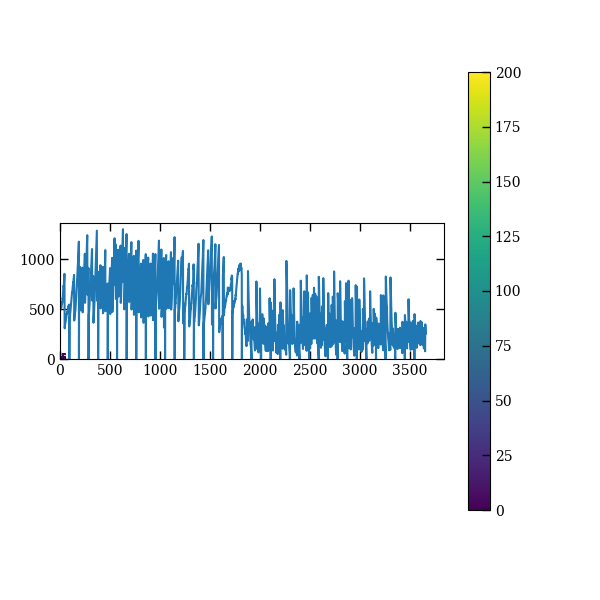

In [11]:
import matplotlib.animation as animation

fig = plt.figure()

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)


thingo = np.nansum(datacube,axis = (1,2)) != 0
test = datacube[thingo,:,:]
Maskdata2 = test#[Framemin::12]
im = plt.imshow(Maskdata2[0,:,:], origin='lower', animated=True,vmin=0,vmax=200)
i = 0
def updatefig(*args):
    global i
    if i<Maskdata2.shape[0]+1:
        i+=1
    im.set_array(Maskdata2[i])
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=60, blit=True)
plt.colorbar()

In [16]:
from scipy.signal import convolve2d
test = np.zeros((50,50))
test[23,26] =1
kernel = np.ones((3,3))
Tran = convolve2d(test, kernel, mode="same")

<IPython.core.display.Javascript object>


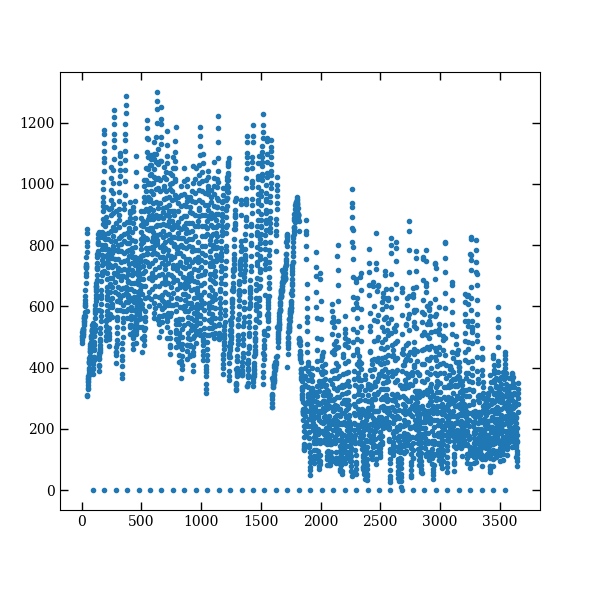

In [22]:
x = np.arrange(0,len())

plt.figure()
plt.plot(np.nansum(datacube*Tran,axis=(1,2)),'.')

In [11]:
len(a)

3657

In [23]:
2000*30/(60*24)

41.666666666666664